# **Classification Metrices**
___
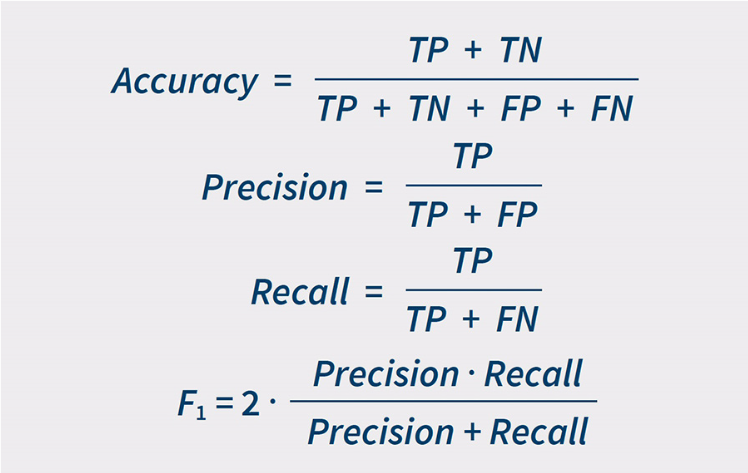


In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


## Accuracy

> Question: When accuracy is misleading?

**Answer**

Imagine a dataset for detecting fraudulent transactions, where:

99% of transactions are not fraud (label = 0)

1% are fraud (label = 1)

You train a classifier, and it just predicts 0 for every transaction.

___
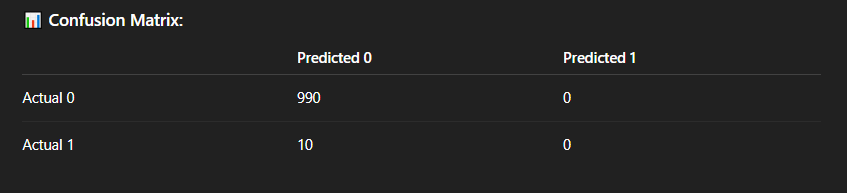
___

Accuracy = (990 correct predictions) / (1000 total) = 99%

Looks great! But the model never catches a fraud case (0% recall for fraud).

___
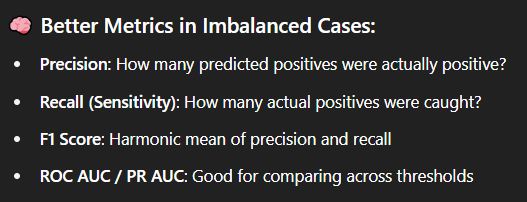
___

In [75]:
data = sns.load_dataset('titanic')

In [76]:
x = data.drop(['survived', 'alive'] , axis=1)
y = data['survived']

In [77]:
x.isnull().sum()

pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alone            0
dtype: int64

In [78]:
x['embark_town']

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

In [79]:
x['age'] = x['age'].fillna(x['age'].mean())
x['deck'] = x['deck'].fillna(x['deck'].mode())
x['embark_town'] = x['embark_town'].fillna(x['embark_town'].mode())

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [81]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_cols = ['sex', 'embarked', 'class', 'who', 'deck', 'embark_town']
numeric_cols = ['pclass', 'age', 'sibsp', 'parch', 'fare']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # keeps numeric columns
)

x_train_encoded = preprocessor.fit_transform(x_train)
x_test_encoded = preprocessor.transform(x_test)

In [82]:
x_train

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
406,3,male,51.000000,0,0,7.7500,S,Third,man,True,NaN,Southampton,True
436,3,female,21.000000,2,2,34.3750,S,Third,woman,False,NaN,Southampton,False
323,2,female,22.000000,1,1,29.0000,S,Second,woman,False,NaN,Southampton,False
326,3,male,61.000000,0,0,6.2375,S,Third,man,True,NaN,Southampton,True
51,3,male,21.000000,0,0,7.8000,S,Third,man,True,NaN,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,3,male,29.699118,0,0,7.8292,Q,Third,man,True,NaN,Queenstown,True
504,1,female,16.000000,0,0,86.5000,S,First,woman,False,B,Southampton,True
246,3,female,25.000000,0,0,7.7750,S,Third,woman,False,NaN,Southampton,True
129,3,male,45.000000,0,0,6.9750,S,Third,man,True,NaN,Southampton,True


In [83]:
lr = LogisticRegression()
dtc = DecisionTreeClassifier()

In [84]:
lr.fit(x_train_encoded, y_train)
dtc.fit(x_train_encoded, y_train)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier()

In [85]:
y_pred1 = lr.predict(x_test_encoded)
y_pred2 = dtc.predict(x_test_encoded)

In [86]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [87]:
print('Logistic Regression:',accuracy_score(y_test, y_pred1) )
print('Decision Tree:',accuracy_score(y_test, y_pred2) )

Logistic Regression: 0.7988826815642458
Decision Tree: 0.7541899441340782


### Confusion Matrix
> Accuracy can be misleading in imbalanced datasets as it hides how the model makes errors.
The confusion matrix overcomes this by showing detailed counts of true/false positives and negatives, revealing the model’s actual performance.

`For Binary Classification`

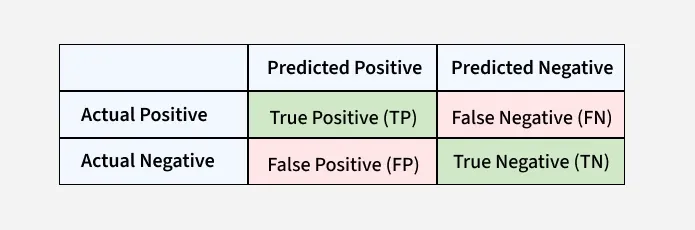
___

`For Multiple Classification`

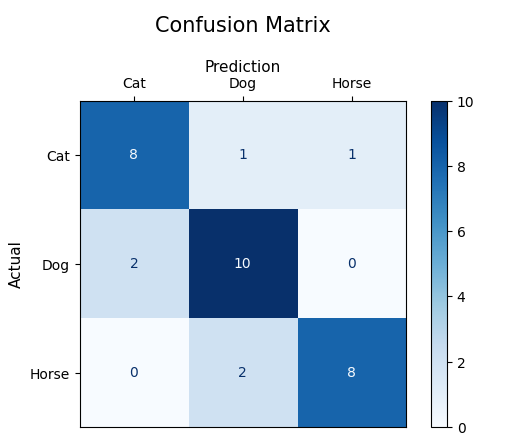

In [88]:
print('Logistic Regression:',confusion_matrix(y_test, y_pred1) )
print('Decision Tree:',confusion_matrix(y_test, y_pred2) )

Logistic Regression: [[86 21]
 [15 57]]
Decision Tree: [[80 27]
 [17 55]]


<Axes: >

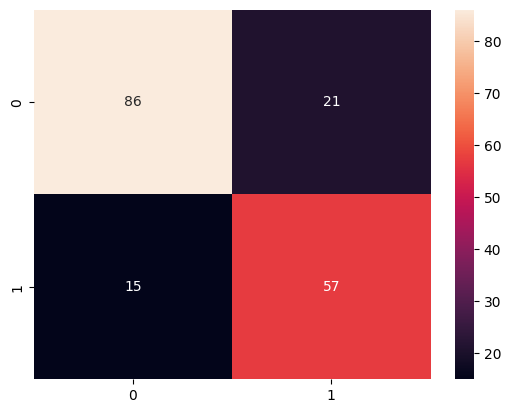

In [89]:
sns.heatmap(confusion_matrix(y_test, y_pred1), annot=True)

In [90]:
df = sns.load_dataset('iris')
df.sample()


# setosa = 1
# virginica = 2
# versicolor = 3
def encode(data):
    if(data == 'setosa'):
        return 1
    elif(data == 'virginica'):
        return 2
    else:
        return 3

df['new_species'] = df['species'].apply(encode)

In [91]:
from sklearn.datasets import load_wine
# Load the dataset
wine = load_wine()

# Convert to DataFrame
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

In [92]:
x = df.drop(['target'], axis=1)
y = df['target']

In [93]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.2, random_state=42)

In [94]:
lr = LogisticRegression()
dtc = DecisionTreeClassifier()


lr.fit(x_train1, y_train1)
dtc.fit(x_train1, y_train1)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier()

In [95]:
pred1 = lr.predict(x_test1)
pred2 = dtc.predict(x_test1)

In [96]:
print('LR: ',accuracy_score(y_test1, pred1))
print('LR: ',confusion_matrix(y_test1, pred1))
print('DTC: ',accuracy_score(y_test1, pred2))
print('DTC: ',confusion_matrix(y_test1, pred2))

LR:  0.9722222222222222
LR:  [[13  1  0]
 [ 0 14  0]
 [ 0  0  8]]
DTC:  0.9444444444444444
DTC:  [[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]


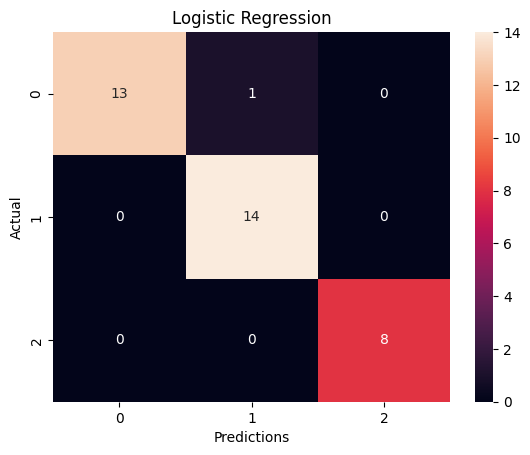

In [97]:
sns.heatmap(confusion_matrix(y_test1, pred1), annot=True)
plt.title('Logistic Regression')
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.show()

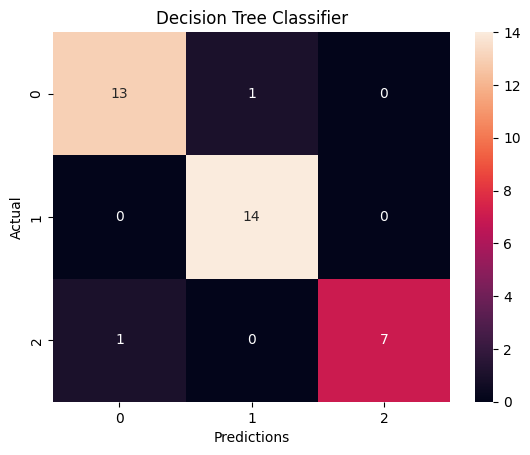

In [98]:
sns.heatmap(confusion_matrix(y_test1, pred2), annot=True)
plt.title('Decision Tree Classifier')
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.show()

### When accuracy is misleading we need some other metrices, like `Precision`, `Recall` and `F1 Score`
___
# Precision (Positive Predictive Value) 
### `Used with Type1 Error` Used when Type1 error is so important/dangerous

Precision measures how many of the predicted positive results are actually correct.

> It measures how many of the positive predictions made by the model are actually correct. It's useful when the cost of false positives is high such as in medical diagnoses where predicting a disease when it’s not present can have serious consequences.

### Table 1

| | Sent to Spam | Not sent to spam |
| :--- | :--- | :--- |
| **Spam** | 100 | 170 |
| **Not Spam** | 30 | 700 |

<br>

### Table 2

| | Sent to Spam | Not sent to spam |
| :--- | :--- | :--- |
| **Spam** | 100 | 190 |
| **Not Spam** | 10 | 700 |

<br>

`Table 1`

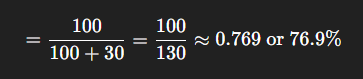

`Table 2`

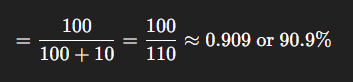

Interpretation of Precision:
Precision tells you:
"Out of all emails predicted as spam, how many were actually spam?"

So, higher precision = fewer false positives, which is critical when wrongly flagging good emails is bad (like missing an important message).

In [99]:
from sklearn.metrics import precision_score, recall_score, f1_score


In [100]:
print('For Binary classification')
print('precision_score LR: ', precision_score(y_test, y_pred1 ))
print('precision_score DTC: ', precision_score(y_test, y_pred2))
print('-'*50)
print('For Multiple classification')
print('precision_score LR: ', precision_score(y_test1, pred1, average='macro'))
print('precision_score DTC: ', precision_score(y_test1, pred2, average='macro'))

For Binary classification
precision_score LR:  0.7307692307692307
precision_score DTC:  0.6707317073170732
--------------------------------------------------
For Multiple classification
precision_score LR:  0.9777777777777779
precision_score DTC:  0.953968253968254


# Recall
### `Used with Type2 error` Used when Type2 error is so important/dangerous

In [101]:
print('For Binary classification')
print('precision_score LR: ', recall_score(y_test, y_pred1 ))
print('precision_score DTC: ', recall_score(y_test, y_pred2))
print('-'*50)
print('For Multiple classification')
print('precision_score LR: ', recall_score(y_test1, pred1, average='macro'))
print('precision_score DTC: ', recall_score(y_test1, pred2, average='macro'))

For Binary classification
precision_score LR:  0.7916666666666666
precision_score DTC:  0.7638888888888888
--------------------------------------------------
For Multiple classification
precision_score LR:  0.9761904761904763
precision_score DTC:  0.9345238095238096


# F1 Score


In [102]:
print('For Binary classification')
print('precision_score LR: ', f1_score(y_test, y_pred1 ))
print('precision_score DTC: ', f1_score(y_test, y_pred2))
print('-'*50)
print('For Multiple classification')
print('precision_score LR: ', f1_score(y_test1, pred1, average='macro'))
print('precision_score DTC: ', f1_score(y_test1, pred2, average='macro'))

For Binary classification
precision_score LR:  0.76
precision_score DTC:  0.7142857142857143
--------------------------------------------------
For Multiple classification
precision_score LR:  0.9761600681140911
precision_score DTC:  0.9424740010946907
